# Classification -   Evaluation

This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use colab

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib,.. and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

### Hints -

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them.

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [3 points]

* Pre-process the dataset and provide a detailed explanation.  [10 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [10 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [5 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [4points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [10 points]

* Compare the results of the classifier using gini and entropy [6 points]

* Print the decision tree visualization with depth of 5 [6points]
* Perform the Random Forest Classifier(RFC) with the same dataset [6]
* Evaluate the decision tree model and Random Forest Classifier[6]
* Perform and plot the ROC curves for the two classifiers on the same graph[6]
* interpret the ROC graph[6]`
* Demo[18]



# CODE

**Task-1**
**Import the libraries and load the dataset (from the csv file) **

In [702]:
import numpy as np          #arrays
import pandas as pd         #datasets
import matplotlib.pyplot as plt    #chats and graph
import seaborn as sns
from sklearn import datasets

In [703]:
#loading the dataset ord reading the dataset
Mydataganga=pd.read_csv("dataset_DT.csv")

**Task-2** Pre-process the dataset and provide a detailed explanation.


Perform 2 visualizations of the features with respect to target variable with detailed explanation.

In [704]:
Mydataganga.head()     #provides the columns and top 5 rows of the dataset and gives the insight of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


In [705]:
Mydataganga.info()     #provides the information about the total value count and data type of the values in all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [706]:
Mydataganga.isnull().sum()   #displays the total count of null values in each column

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [707]:
Mydataganga.duplicated().sum()   #i am checking for the duplicates in my dataset

0

In [708]:
Mydataganga.columns          #displays the columns in the dataset without data

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [709]:
Mydataganga["balance"].value_counts()   #displays the each unique value count in balance feature

0.0       1111
1.0         51
2.0         49
3.0         37
4.0         37
          ... 
3297.0       1
1467.0       1
2534.0       1
1305.0       1
4416.0       1
Name: balance, Length: 5164, dtype: int64

In [710]:
Mydataganga["duration"].value_counts()   # #displays the each unique value count in duration feature

158.0     61
226.0     59
178.0     56
207.0     55
151.0     55
          ..
1331.0     1
1608.0     1
1508.0     1
1833.0     1
1298.0     1
Name: duration, Length: 1560, dtype: int64

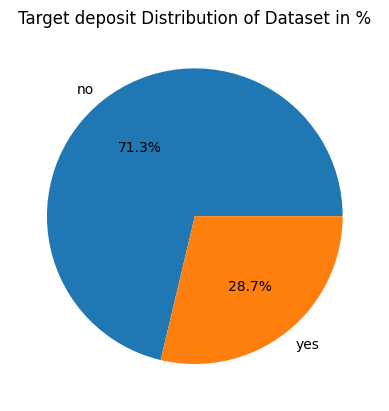

In [711]:
#visualize the target variable
y_target=Mydataganga['y'].value_counts()

plt.pie(y_target, labels=y_target.index, autopct='%2.1f%%')
plt.title('Target deposit Distribution of Dataset in %')
plt.show()
#here i am checking what percent of deposit is present for both yes and no

In [712]:
#converting the catergorical features to numerical features
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Mydataganga['y']=encoder.fit_transform(Mydataganga['y'])

In [713]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Mydataganga['marital']=encoder.fit_transform(Mydataganga['marital'])
Mydataganga['job']=encoder.fit_transform(Mydataganga['job'])
Mydataganga['education']=encoder.fit_transform(Mydataganga['education'])
Mydataganga['contact']=encoder.fit_transform(Mydataganga['contact'])
Mydataganga['poutcome']=encoder.fit_transform(Mydataganga['poutcome'])
Mydataganga['default']=encoder.fit_transform(Mydataganga['default'])
Mydataganga['housing']=encoder.fit_transform(Mydataganga['housing'])
Mydataganga['loan']=encoder.fit_transform(Mydataganga['loan'])
Mydataganga['month']=encoder.fit_transform(Mydataganga['month'])

In [714]:
Mydataganga["marital"].value_counts()    ## #displays the each unique value count in marital feature

1    10693
2     5667
0     2063
Name: marital, dtype: int64

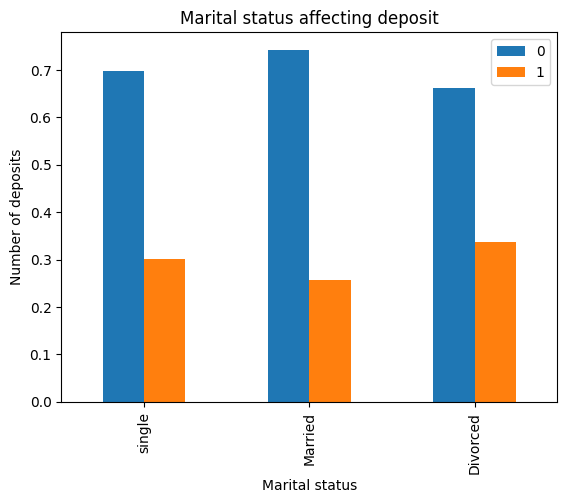

In [715]:
#visualize the marital with respect to target variable
# pd.crosstab will help with the better visualization by prividing the relationship between the feature and target variable
pd.crosstab(Mydataganga['marital'],Mydataganga['y'],normalize='index').plot(kind="bar", title="Marital status affecting deposit")
plt.xticks(ticks=[0,1,2],labels=['single','Married','Divorced'])  #giving the index order for the values

plt.xlabel('Marital status')
plt.ylabel('Number of deposits')
plt.legend()   #tell us what color represents what
plt.show()

#clearly the chart show the no is deposit is more , so marital feature is not an influenced feature on target variable
#It looks like, under the marital status the deposits are less, but comapred to all three, single, married and divorced, divorced deposited more

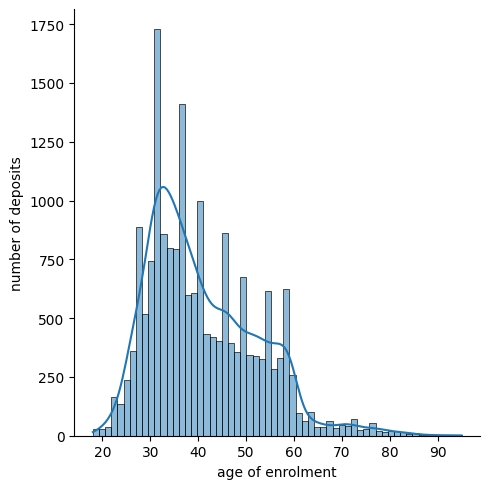

In [716]:
#age and the deposit
#visualize the marital with respect to target variable
sns.displot(Mydataganga['age'] ,kde=True)
Mydataganga['age'].describe()

plt.xlabel('age of enrolment')
plt.ylabel('number of deposits')
plt.show()

#i can cleary see that the graph shows people in their 90's, which is not possible , so i am checking for ouliers

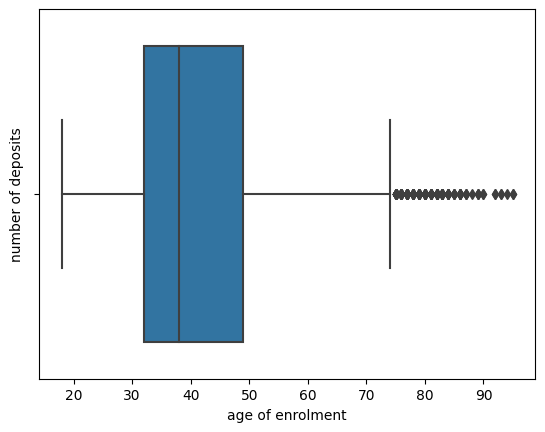

In [717]:
#visualize the marital with respect to target variable (box plot)
sns.boxplot(x=Mydataganga['age'])
plt.xlabel('age of enrolment')
plt.ylabel('number of deposits')
plt.show()
#box plot will display us the outliers if there are any.
#the below plot shows the outliers from the 73-75

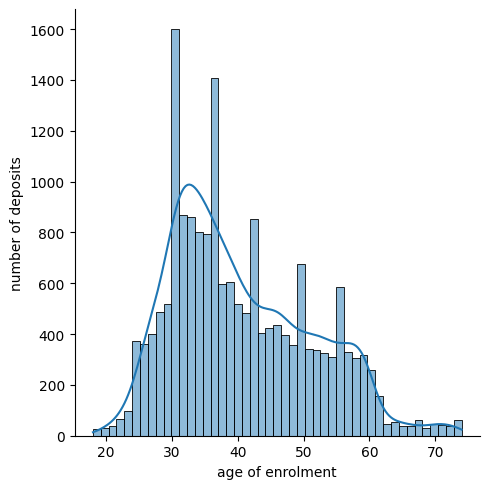

In [718]:
#let us find the outliers and visualize the age with respect to traget variable without outliers
Quartile1g=Mydataganga['age'].quantile(0.25)
Quartile3g=Mydataganga['age'].quantile(0.75)

#claculate IQR
InterQuartileRangeg= Quartile3g-Quartile1g            #finding the inter quartile range

boundarylower=Quartile1g-1.5*InterQuartileRangeg
boundaryupper=Quartile3g+1.5*InterQuartileRangeg

#i am checking for the outliers
outliersinage=Mydataganga[(Mydataganga['age']>=boundarylower) & (Mydataganga['age']<=boundaryupper)]

#age and the deposit
sns.displot(data=outliersinage,x='age',kde=True)
plt.xlabel('age of enrolment')
plt.ylabel('number of deposits')
plt.show()
#the below plot show the age feature witout outliers with respect to the target variable
#after removing the ouliers the graph shows us the deposits done with 70 years of age

In [719]:
Mydataganga.isnull().sum()       #chacking for the dull values after dropping 2 features

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [720]:
Mydataganga.drop(columns=['day'],inplace=True)
#Mydataganga.day.fillna(Mydataganga.day.median(),inplace=True)            --gives the same accuaracy

In [721]:
Mydataganga.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [722]:
 Mydataganga.corr()                #displays the corrolation between 2 features

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.023393,-0.429134,-0.096083,-0.016279,0.105569,-0.197543,-0.029401,0.029297,-0.019337,0.000373,0.011154,-0.000569,0.022690,-0.014145,0.039743
job,-0.023393,1.000000,0.077548,0.144999,-0.019008,0.024277,-0.141882,-0.047082,-0.091127,-0.069503,-0.002530,0.005688,-0.009022,0.016095,-0.003459,0.060220
marital,-0.429134,0.077548,1.000000,0.110151,-0.004264,-0.009216,-0.028301,-0.042067,-0.051744,-0.014618,-0.009998,-0.021473,0.005938,0.010699,-0.003338,0.049612
education,-0.096083,0.144999,0.110151,1.000000,-0.007117,0.058259,-0.097684,-0.046822,-0.092547,-0.043350,-0.017023,0.004744,0.004321,0.019905,-0.020680,0.078577
default,-0.016279,-0.019008,-0.004264,-0.007117,1.000000,-0.053711,0.001528,0.060077,0.013451,-0.000795,0.024813,0.001822,-0.028764,-0.026735,0.034658,-0.004343
balance,0.105569,0.024277,-0.009216,0.058259,-0.053711,1.000000,-0.070754,-0.077488,-0.009446,0.013567,-0.063482,0.028310,-0.025938,0.002559,0.014975,-0.007689
housing,-0.197543,-0.141882,-0.028301,-0.097684,0.001528,-0.070754,1.000000,0.064018,0.190326,0.188810,0.044015,-0.012951,0.091822,0.001721,-0.069451,-0.200340
loan,-0.029401,-0.047082,-0.042067,-0.046822,0.060077,-0.077488,0.064018,1.000000,0.011918,0.022611,0.020150,0.003496,-0.018165,-0.012535,0.006502,-0.081794
contact,0.029297,-0.091127,-0.051744,-0.092547,0.013451,-0.009446,0.190326,0.011918,1.000000,0.285994,0.051687,0.055530,-0.258988,-0.196213,0.297844,-0.190742
month,-0.019337,-0.069503,-0.014618,-0.043350,-0.000795,0.013567,0.188810,0.022611,0.285994,1.000000,-0.004756,-0.081839,0.023436,0.025305,-0.033363,-0.045679


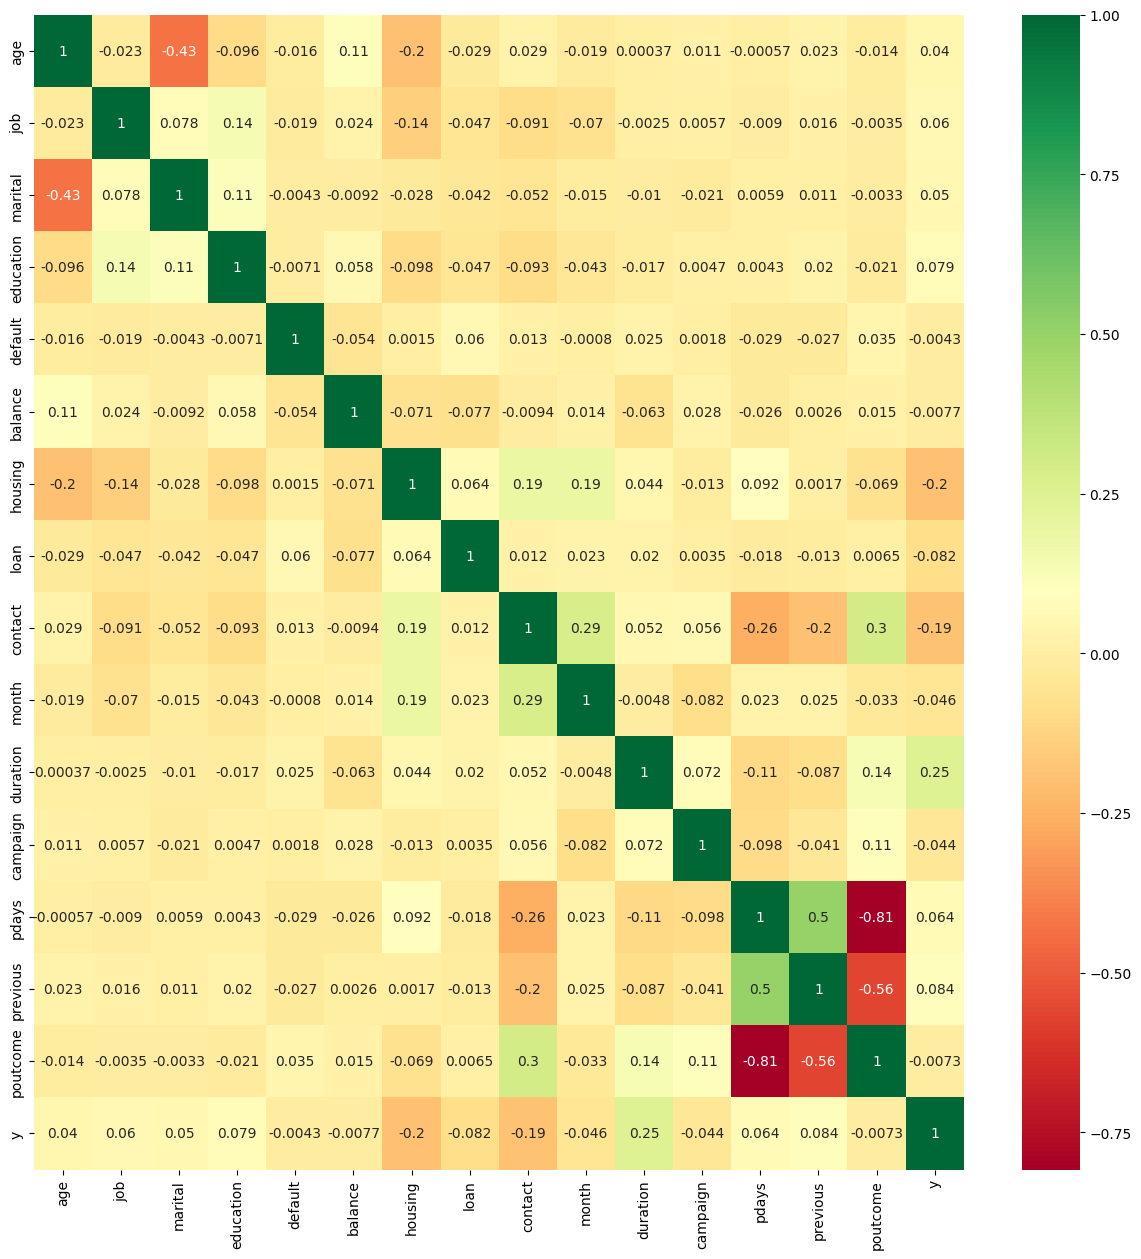

In [723]:
#heap map - other way to check the corrolation between 2 features
features =Mydataganga.corr().index
plt.figure(figsize=(15,15))
g=sns.heatmap(Mydataganga[features].corr(),annot=True,cmap="RdYlGn") # the correlation values between features are displayed with the annot=True

#6 most influenced features on target class are- "duration, balance, age, campaign,job, poutcome"
#i can remove the higest corrolated feature, but removing it can only cause the decrease in accuracy   if i remove duration accuracy for DT= 0.74 and for RF=0.76
#Highly linked or higly corrolated feature might make the model harder to train and understand.

Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the Six most influential attributes with detailed explanation.

[0.12842754 0.07187778 0.03008261 0.04462307 0.00327739 0.12489559
 0.03625245 0.01296082 0.03985658 0.11047951 0.20360682 0.07438127
 0.04139854 0.02987864 0.04800138]


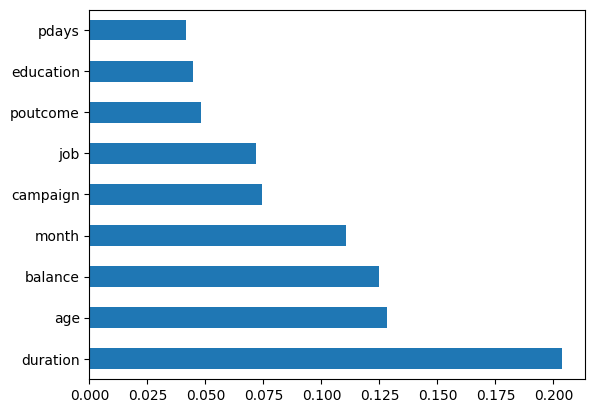

In [724]:
#checking for the most influenced features with respect to target variable with feature importance model
independentX = Mydataganga.iloc[:,:-1]
dependentY = Mydataganga.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
Mymodel = ExtraTreesClassifier()
Mymodel.fit(independentX,dependentY)
print(Mymodel.feature_importances_)

Impfeature = pd.Series(Mymodel.feature_importances_, index=independentX.columns)
Impfeature.nlargest(9).plot(kind='barh')
plt.show()

Split your dataset 75% for training, and 25% for testing the classifier.


In [725]:
#splitting the data into train set and test set
from sklearn.model_selection import train_test_split
independentX = Mydataganga.iloc[:,:-1]
dependentY = Mydataganga.iloc[:,-1]
independentX_train,independentX_test,dependentY_train,dependentY_test=train_test_split(independentX,dependentY,test_size=0.25,random_state=42)

feature scaling

In [726]:
from sklearn.preprocessing import StandardScaler

scg = StandardScaler()
num_cols = ['age', 'balance', 'campaign', 'pdays', 'previous','duration']
scg_num_cols = scg.fit_transform(Mydataganga[num_cols])
Mydataganga[num_cols]=scg_num_cols

In [727]:
Mydataganga

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,-0.606755,1,2,1,0,3.088450,0,0,0,0,0.727712,-0.141015,-0.519520,-0.393435,3,0
1,0.702327,4,0,2,0,5.044118,0,0,0,0,-0.392224,0.363631,0.663204,0.504849,0,0
2,-0.781300,7,2,2,0,-0.028488,1,0,0,0,2.302428,-0.645660,1.810357,0.953992,1,0
3,0.440510,4,0,2,0,2.303136,1,0,0,0,-0.649004,-0.141015,-0.519520,-0.393435,3,0
4,-1.304933,4,2,2,0,1.544009,0,0,0,0,-0.460286,-0.645660,-0.519520,-0.393435,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,0.004150,9,1,1,0,0.080798,0,0,0,11,-0.859379,-0.645660,0.565385,0.055707,1,0
18419,1.400504,4,1,3,0,-0.494225,0,0,0,11,0.535900,-0.645660,-0.519520,-0.393435,3,0
18420,-0.083122,1,1,1,0,-0.106512,0,0,0,11,-0.911973,-0.645660,0.565385,0.055707,2,1
18421,-0.257667,9,2,1,0,-0.037039,0,0,1,11,-0.550005,-0.645660,-0.519520,-0.393435,3,1



Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.


In [728]:
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,f1_score,classification_report,confusion_matrix

#Create and train decission tree classification with different parameters
max_depth=10      #depth can be of any number
min_samples_leaf=5     #min sample leaf can be any number

#decission tree with gini impurity using criterion
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=max_depth, min_samples_leaf=min_samples_leaf,random_state=42)
clf_gini.fit(independentX_train,dependentY_train)            #training the model with gini criterion
dependentY_pred_gini=clf_gini.predict(independentX_test)     #predictiong the model
accuracy_gini=accuracy_score(dependentY_test,dependentY_pred_gini)     #accuracy of the model using gini
print(f'Accuracy(Gini): {accuracy_gini}')


#criterion,max_depth,min_samples_leaf are the parameter in decision tree classifier

#decission tree with entropy
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, min_samples_leaf=min_samples_leaf,random_state=42)
clf_entropy.fit(independentX_train,dependentY_train)               #training the model with entropy criterion
dependentY_pred_entropy=clf_entropy.predict(independentX_test)     #predictiong the model
accuracy_entropy=accuracy_score(dependentY_test,dependentY_pred_entropy)   #accuracy of the model using entripy
print(f'Accuracy(entropy): {accuracy_entropy}')


# max_depth       min_samples_leaf    accuracy_gini     accuracy_entropy
#   10                    5            0.772              0.775
#   15                    10           0.759              0.757
#   5                     10           0.746              0.747
#   2                     15           0.714              0.714
#   10                    1            0.773              0.771
#   15                    2            0.751              0.751
#   7                     5            0.764              0.767
#   5                     5            0.747              0.747

#For example, if you have a binary classification problem with a dataset where the class distribution in a node is perfectly balanced (e.g., 50% of class A and 50% of class B), then both the Gini impurity and entropy will be 0.5. In such cases, you will indeed observe that Gini and entropy produce the same values.

Accuracy(Gini): 0.7666087711680417
Accuracy(entropy): 0.7761615284411637


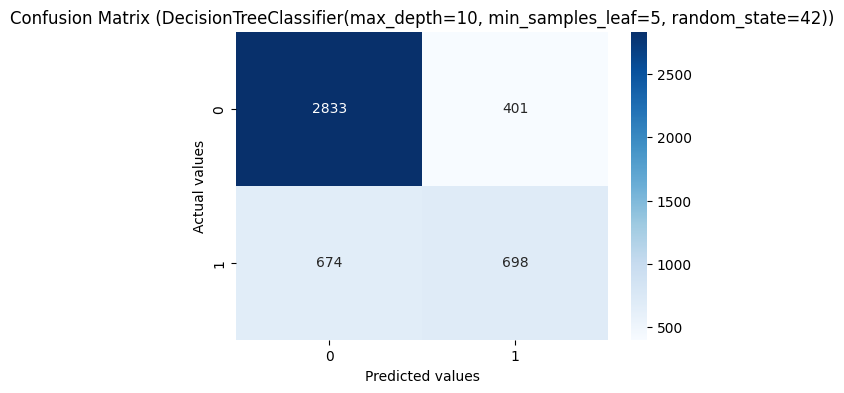

Classification Report (DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3234
           1       0.64      0.51      0.56      1372

    accuracy                           0.77      4606
   macro avg       0.72      0.69      0.70      4606
weighted avg       0.76      0.77      0.76      4606

0: F1 score=0.88, Precision=0.84, Recall=3234.00


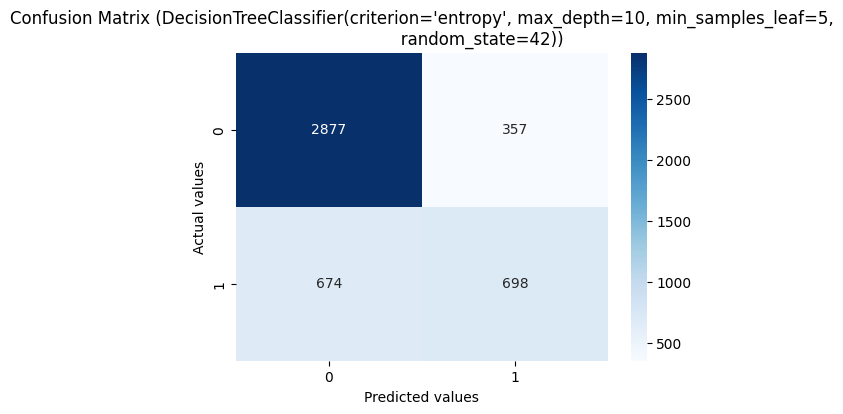

Classification Report (DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3234
           1       0.66      0.51      0.58      1372

    accuracy                           0.78      4606
   macro avg       0.74      0.70      0.71      4606
weighted avg       0.77      0.78      0.77      4606

0: F1 score=0.89, Precision=0.85, Recall=3234.00


In [729]:
nameoftheclassg = ['0', '1']  # i have given class names as 0 and 1 for the confusion matrix heat map
listcriteriong = ['gini', 'entropy']  #i have creted a list for the crietion
listofclassifierg = [] # i have created a empty list to store the criterion results after the training in decisiion tree

#create ddecission model and used loop to train decission model with both gini and entropy criterion
for criterion in listcriteriong:
    classifierg = DecisionTreeClassifier(max_depth=max_depth ,min_samples_leaf=5,criterion=criterion, random_state=42 )
    classifierg.fit(independentX_train, dependentY_train)
    listofclassifierg.append(classifierg)

#enumerate to keep track of the position or index of the item
for i, clfg in enumerate(listofclassifierg ):
    dependentY_pred = clfg.predict(independentX_test)
    criterion =  listofclassifierg[i]


   #get the confusion matric in graphycal way
    cm = confusion_matrix(dependentY_test, dependentY_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, fmt='d', annot=True, cmap='Blues', xticklabels=nameoftheclassg, yticklabels=nameoftheclassg)           #ploting the confusion matrix as heat map
    plt.xlabel('Predicted values') #name of the x axis
    plt.ylabel('Actual values')    #name of the y axis
    plt.title(f'Confusion Matrix ({criterion})')    #title of the heatmap with respect to it's criterion gini and entropy in a lop
    plt.show()
   #get the classification report
    classificationreport = classification_report(dependentY_test, dependentY_pred, target_names=nameoftheclassg)
    print(f'Classification Report ({criterion}):\n{classificationreport}')

    lines = classificationreport.split('\n')
    cmetrics = lines[2].split()
    f1 = float(cmetrics[2])                     #f1 score
    p = float(cmetrics[3])              #presission
    r = float(cmetrics[4])                 #recall

    print(f'{nameoftheclassg[0]}: F1 score={f1:.2f}, Precision={p:.2f}, Recall={r:.2f}') #displaying all three f1_score, presission and recall for both ginin and entropy



Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.


Print the decision tree visualization with depth of 5


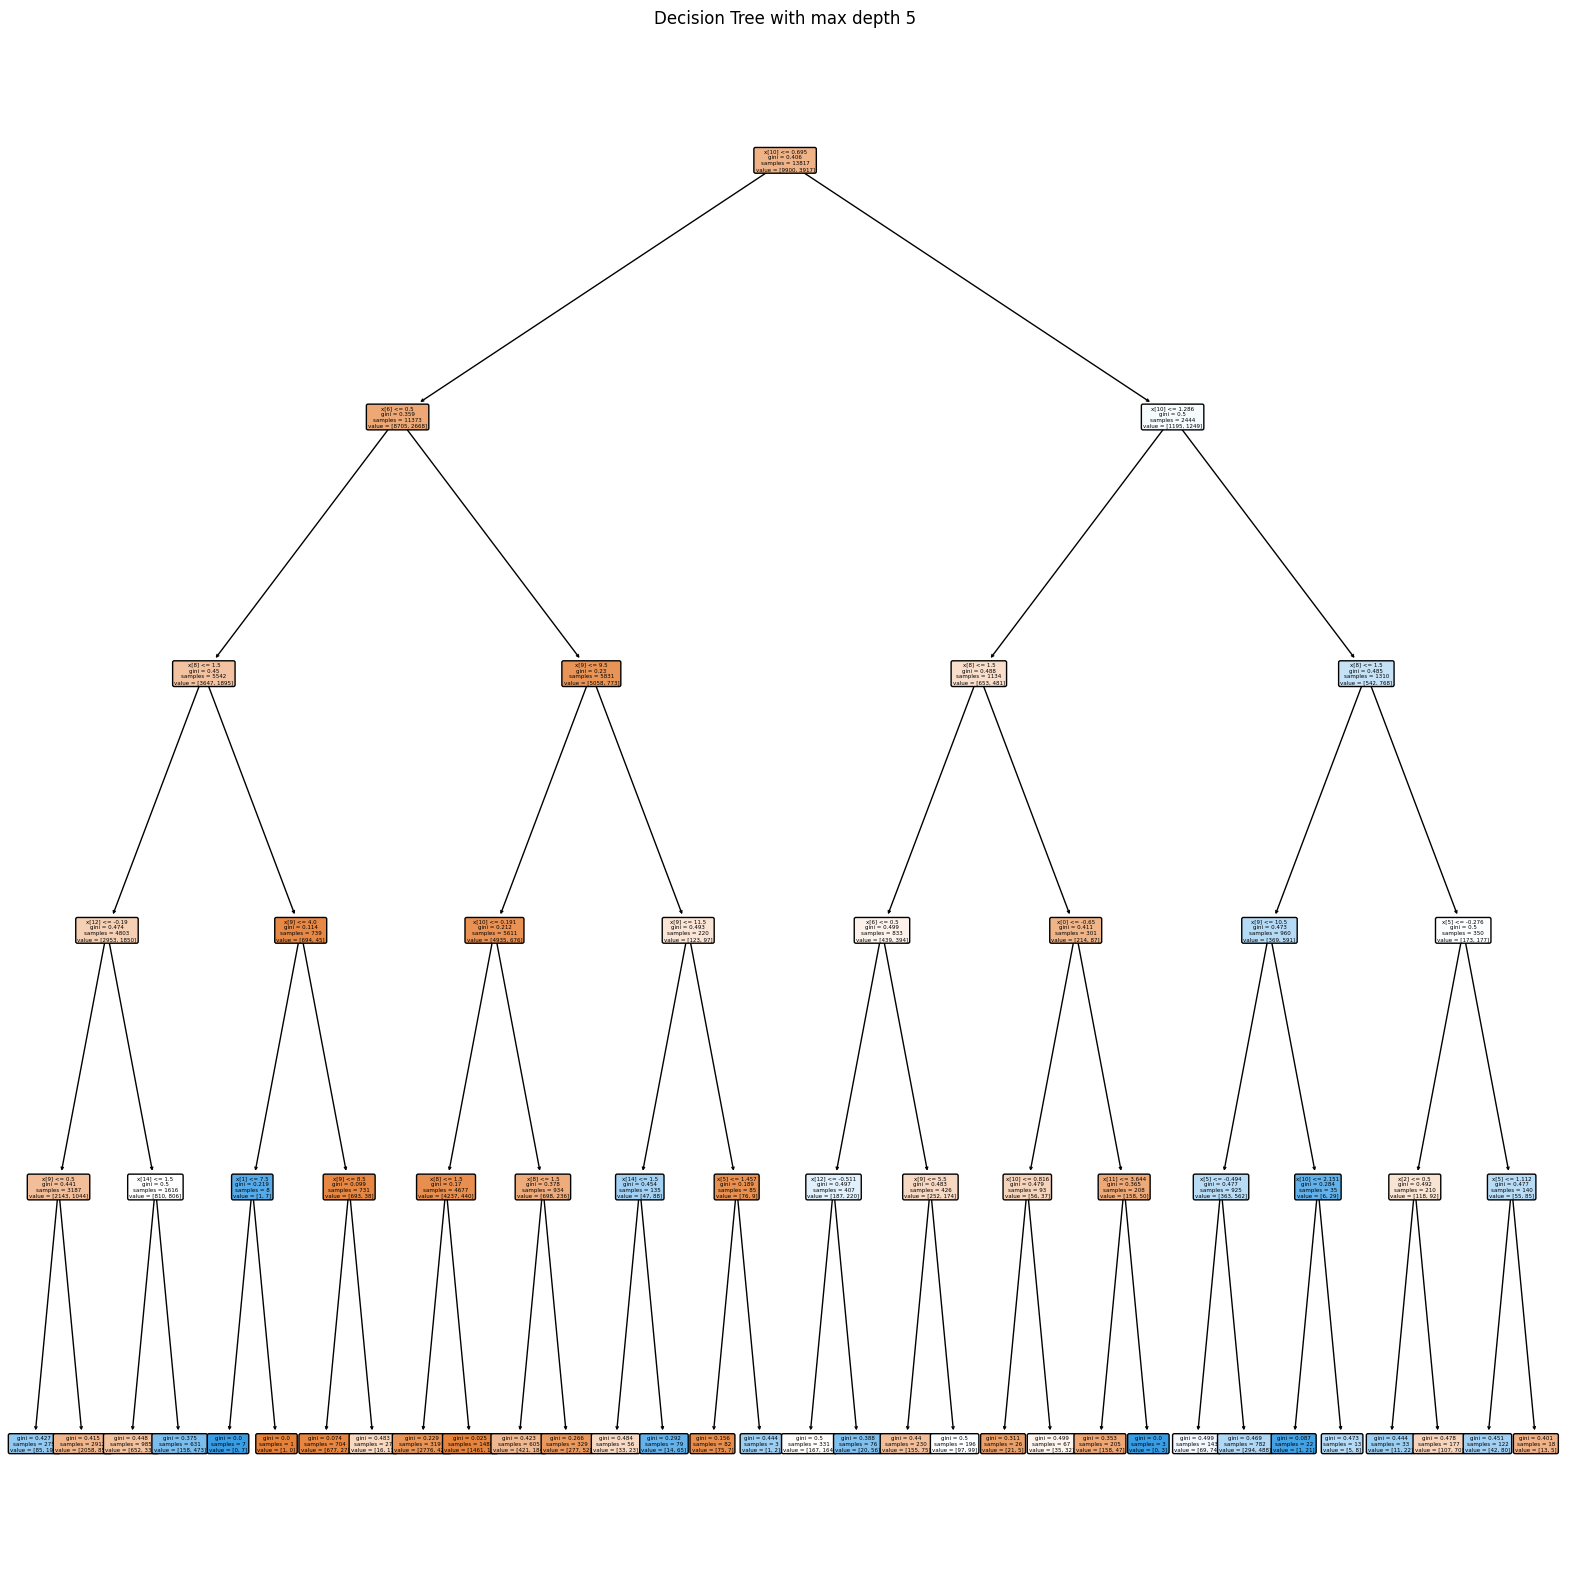

Accuracy 0.761615284411637


In [730]:
from sklearn.model_selection import train_test_split
independentX=Mydataganga.iloc[:,:-1].values #indepent data
dependentY=Mydataganga.iloc[:,-1].values #dependent data
independentX_train,independentX_test,dependentY_train,dependentY_test=train_test_split(independentX,dependentY,test_size=0.25,random_state=42)



clfg=DecisionTreeClassifier(max_depth=5, random_state=0 )
clfg.fit(independentX_train,dependentY_train)
dependentY_pred=clfg.predict(independentX_test)


plt.figure(figsize=(20,20))
from sklearn.tree import plot_tree
plot_tree(clfg, filled=True, rounded=True,fontsize=4)
plt.title("Decision Tree with max depth 5")
plt.show()

#calculating the accuracy for decision tree classifier
accuracy=accuracy_score(dependentY_test,dependentY_pred)
print(f'Accuracy {accuracy}')


Perform the Random Forest Classifier(RFC) with the same dataset


In [731]:
#creating and training the models into randomforest classifier
from sklearn.ensemble import RandomForestClassifier
classifierg=RandomForestClassifier(n_estimators=100,random_state=42)
classifierg.fit(independentX_train,dependentY_train)
dependentY_pred=classifierg.predict(independentX_test)
#accuracy
accuracy=accuracy_score(dependentY_test,dependentY_pred)
print(f"accuaracy: {accuracy}")


accuaracy: 0.7831089882761615


Evaluate the decision tree model and Random Forest Classifier

In [732]:
#here i am calculating confusion matrix , precission, recall and F1_score for both decission tree and random forest classification
from sklearn.metrics import accuracy_score, recall_score,f1_score,classification_report,confusion_matrix,precision_score

clfg=DecisionTreeClassifier(max_depth=5, random_state=42)
clfg.fit(independentX_train,dependentY_train)
dependentY_pred=clfg.predict(independentX_test)
print("Decision Tree Classifier Evaluation:")
#confusion matrix
cm=confusion_matrix(dependentY_test,dependentY_pred)
print("confusion matrix")
print(cm)

#accuracy
accuracy=accuracy_score(dependentY_test,dependentY_pred)
print(f"accuaracy: {accuracy}")

#precission
precision=precision_score(dependentY_test,dependentY_pred)
print(f"Precision score: {precision:.2f}")

#recall
recall=recall_score(dependentY_test,dependentY_pred)
print(f"recall score: {recall:.2f}")

#f1-measure
f1=f1_score(dependentY_test,dependentY_pred)
print(f"f1_score: {f1:.2f}")

print("\nRandomForestClassifier Evaluation:")
classifierg=RandomForestClassifier(n_estimators=100, criterion= 'entropy',random_state=42)
classifierg.fit(independentX_train,dependentY_train)
dependentY_pred=classifierg.predict(independentX_test)
#confusion matrix
cm=confusion_matrix(dependentY_test,dependentY_pred)
print("confusion matrix")
print(cm)

#accuracy
accuracdependentY=accuracy_score(dependentY_test,dependentY_pred)
print(f"accuaracy: {accuracdependentY}")

#precission
precisiong=precision_score(dependentY_test,dependentY_pred)
print(f"Precision score: {precisiong:.2f}")

#recall
recallg=recall_score(dependentY_test,dependentY_pred)
print(f"recall score: {recallg:.2f}")


f1g=f1_score(dependentY_test,dependentY_pred)
print(f"f1 score: {f1g:.2f}")


Decision Tree Classifier Evaluation:
confusion matrix
[[2958  276]
 [ 824  548]]
accuaracy: 0.7611810681719496
Precision score: 0.67
recall score: 0.40
f1_score: 0.50

RandomForestClassifier Evaluation:
confusion matrix
[[2917  317]
 [ 689  683]]
accuaracy: 0.7815892314372558
Precision score: 0.68
recall score: 0.50
f1 score: 0.58


Perform and plot the ROC curves for the two classifiers on the same graph

interpret the ROC graph

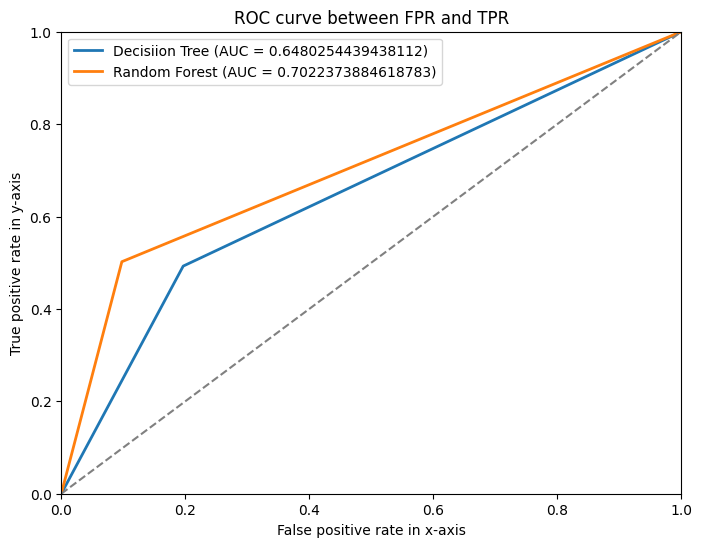

In [733]:
from sklearn.metrics import roc_curve,auc
#split data
from sklearn.model_selection import train_test_split
independentX=Mydataganga.iloc[:,:-1] #indepent data
dependentY=Mydataganga.iloc[:,-1] #dependent data
independentX_train,independentX_test,dependentY_train,dependentY_test=train_test_split(independentX,dependentY,test_size=0.25,random_state=42)

#creating both decission tree and random forest classifier
dt_clf=DecisionTreeClassifier(random_state=42)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)

#fit the classifiers on the training data
dt_clf.fit(independentX_train,dependentY_train)
rf_clf.fit(independentX_train,dependentY_train)

#claculate ROC curve and AUC for both classifiers
dependentY_pred_dt=dt_clf.predict(independentX_test)
dependentY_pred_rf=rf_clf.predict(independentX_test)

fpr_dt, tpr_dt, _ =roc_curve(dependentY_test,dependentY_pred_dt)
fpr_rf, tpr_rf, _ =roc_curve(dependentY_test,dependentY_pred_rf)

roc_auc_dt=auc(fpr_dt, tpr_dt)
roc_auc_rf=auc(fpr_rf, tpr_rf)


plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt,lw=2 , label=f'Decisiion Tree (AUC = {roc_auc_dt})')    #area under curev for decision tree
plt.plot(fpr_rf, tpr_rf,lw=2, label=f'Random Forest (AUC = {roc_auc_rf})')      #area under curev for random forest

plt.plot([0,1],[0,1],color='gray',linestyle='--')
plt.xlim([0.0,1.0])     #xlim will remove the extra space from x-axis
plt.ylim([0.0,1.0])     #ylim will remove the extra space from y-axis
plt.xlabel('False positive rate in x-axis')
plt.ylabel('True positive rate in y-axis')
plt.title('ROC curve between FPR and TPR')
plt.legend()
plt.show()
# random forest classifier has better performance than the decision tree classifier.
#The AUC for the random forest classifier is 0.7022, while the AUC for the decision tree classifier is 0.6483.
#This means that the random forest classifier is more likely to correctly identify positive cases (true positives) and less likely to incorrectly identify negative cases as positive (false positives).

